In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
filepath = "/OCDOnlineProjects_DATA_2025-02-20_1413.csv"
data = pd.read_csv(filepath)    # read data from csv file
data = data.reset_index(drop=True)    # reset index


#### run the following block to remove IDs:

In [ ]:
ids_taken_out = [17404, 17439, 17444, 17447, 17449, 17451, 17457, 17466, 17662, 17664, 17672, 17694, 17696, 17699, 17702, 17703, 17705, 17709, 17710, 17711, 17717, 17727, 19235, 19238, 19243, 19244, 19316, 19326, 19333, 19338, 19339, 19353, 19363, 19368, 19376, 19377, 19387, 19390]
prolific_ids = []

#filepath to dataset_2025.csv
filepath2= "/Dataset_2025.csv"
ids = pd.read_csv(filepath2)

for i in ids["dataID"]:
    if i in ids_taken_out:
        prolific_ids.append(ids[ids["dataID"] == i]["prolificID"].values[0])

print(prolific_ids)

# remove rows with specific prolificIDs 
data = data[~data["prolific_id_v2_v2"].isin(prolific_ids)]
data = data.reset_index(drop=True)   

data = data[~data["prolific_id_v2"].isin(prolific_ids)]
data = data.reset_index(drop=True)   

['5d55919845cfe20019b1c7d7', '665c7ece76b5f49e54a789b3', '60e0dc6be0772b7dfdad9b2c', '5fa0803077c8550dcb24237d', '6701ad9bbdc4d73b21702d64', '5f102a09b48e422804eff318', '5ab912d7e1546900019b7674', '63d3ff7455fe68b811ef6b57', '6637c44cb54ab265ecb86d3d', '66990d332513e41439621e21', '665bf5d1d0a8c603ab8b5f9a', '66c9f7305f8a64d04cb5344c', '672dd8c8168737a89c25e74f', '63bc6b6c7a3d5b328d28247f', '586fbaa37e187d0001cb36d5', '673c5dcf6f78c6392cc62496', '6659a4d0fe7536ccbcf9c133', '6658bd4310ee952480a920ba', '609bac863103cd810a60f3a8', '66c0c15f49b458efaaadc3eb', '59b5b916834a170001d60a28', '5e2330f7d6dc3f000b6612da', '67311b436baff30462230061', '6716a1fae7ca6e212ef61ed7', '661188f9f088ba0f673a6935', '5a94a557f6dfdd0001ea4d91', '66d868d3d2165f7a9bd9a9ee', '66df649422e557253882cee8', '672e22142aab65aaeec4135f', '59864648fd8cca00015cbb09', '5f8b3e21f8638825023495db', '61648be296a6aa6811817678', '60d42bb2a94bb76934476fd1', '5c4338d8a04c050001a0a876', '63f7dc10de20707c3dff50b4', '5d9ba1475e15660011

In [153]:
gender = pd.concat([data["gender"], data["gender_v2"]])
age = pd.concat([data["age"], data["age_v2"]])
education = pd.concat([data["education"], data["education_v2"]]) 
ethnicity = pd.concat([data["ethnicity"], data["ethnicity_v2"]])


In [154]:
gender_categories = {1: "non-binary", 2: "female", 3: "male", 4: "other"}
education_categories = {0: "Unknown", 1: "No formal schooling", 2: "Primary School", 3: "Secondary School", 4: "College", 5: "Undergraduate or equivalent", 6: "Master´s or equivalent", 7: "Doctorate/PhD or equivalent"}
ethnicity_categories = {0: "Unknown", 1: "Asian", 2: "Arab", 3: "Black/African/Caribbean", 4: "Latino/Hispanic", 5: "White/Caucasian", 6: "Other"}    

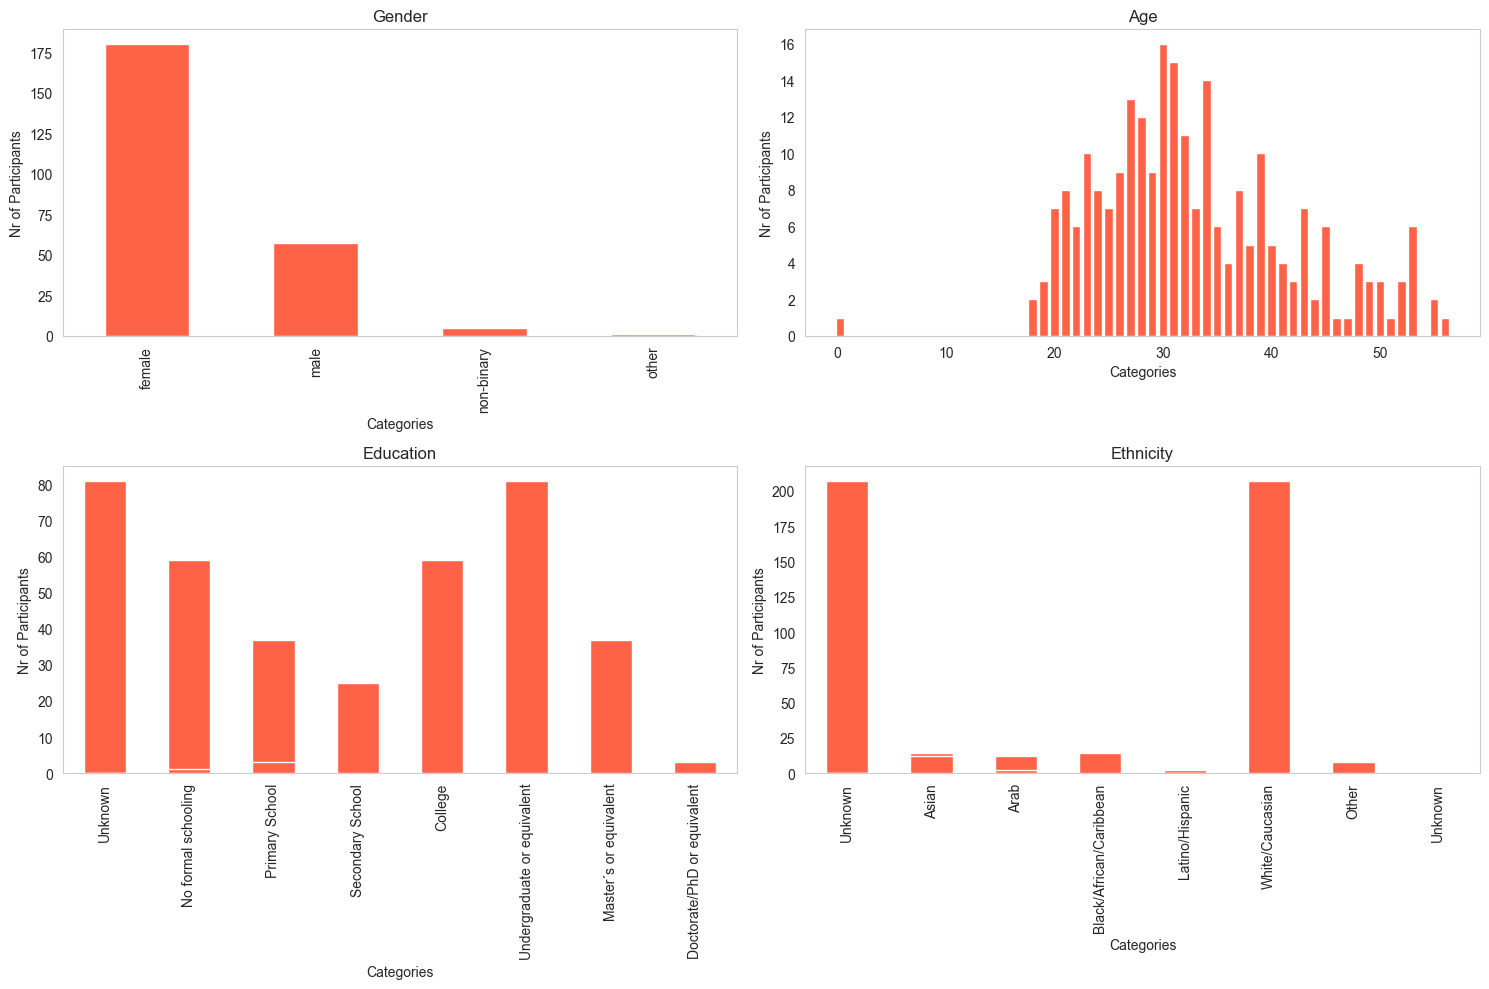

In [155]:
# plot the count for each unique value in each category

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Calculate standard deviations for each category
gender_std = gender.value_counts().std()
education_std = education.value_counts().std()
ethnicity_std = ethnicity.value_counts().std()


    
# Plot gender
gender.value_counts().plot(kind='bar', ax=axes[0, 0], title='Gender', color='tomato')
axes[0, 0].set_xticklabels([gender_categories.get(x, 'Unknown') for x in gender.value_counts().index])

# Plot age
axes[0, 1].bar(age.value_counts().index, age.value_counts(), color='tomato')  
axes[0, 1].set_title('Age')     

# Plot education
education.value_counts().plot(kind='bar', ax=axes[1, 0], title='Education', color='tomato')
education_counts = education.value_counts()
education_counts = education_counts.reindex(range(8), fill_value=0)
education_counts.plot(kind='bar', ax=axes[1, 0], title='Education', color='tomato')
axes[1, 0].set_xticklabels([education_categories.get(x, 'Unknown') for x in education_counts.index])

# Plot ethnicity
ethnicity.value_counts().plot(kind='bar', ax=axes[1, 1], title='Ethnicity', color='tomato')
ethnicity_counts = ethnicity.value_counts()
ethnicity_counts = ethnicity_counts.reindex(range(8), fill_value=0)
ethnicity_counts.plot(kind='bar', ax=axes[1, 1], title='Ethnicity', color='tomato')
axes[1, 1].set_xticklabels([ethnicity_categories.get(x, 'Unknown') for x in ethnicity_counts.index])

# Remove grid from all subplots
for ax in axes.flat:
    ax.grid(False)
    ax.set_xlabel('Categories')         
    ax.set_ylabel('Nr of Participants')

plt.tight_layout()
plt.show()

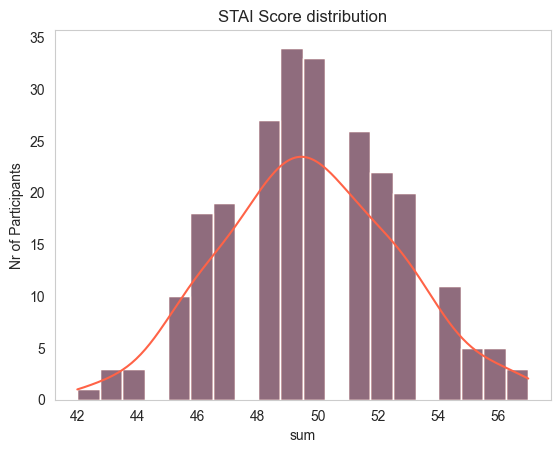

In [145]:

# search all columns for the word "stai" and print the column names and add all data in these columns into a new dataframe
stai = pd.DataFrame()       
for column in data.columns:
    if "stai_3" in column or "stai_4" in column or "stai_6" in column or "stai_7" in column or "stai_9" in column or "stai_12" in column or "stai_13" in column or "stai_14" in column or "stai_17" in column or "stai_18" in column or "stai_22" in column or "stai_23" in column or "stai_24" in column or "stai_25" in column or "stai_28" in column or "stai_29" in column or "stai_31" in column or "stai_32" in column or "stai_34" in column or "stai_35" in column or "stai_37" in column or "stai_38" in column or "stai_40" in column:
        # add column to stai dataframe
        stai[column] = data[column]
    elif "stai_1" in column or "stai_2" in column or "stai_5" in column or "stai_8" in column or "stai_10" in column or "stai_11" in column or "stai_15" in column or "stai_16" in column or "stai_19" in column or "stai_20" in column or "stai_21" in column or "stai_26" in column or "stai_27" in column or "stai_30" in column or "stai_33" in column or "stai_36" in column or "stai_39" in column:
        stai[column] = np.abs(5 - data[column])

# for each row add all stai values togehter and add the sum to a new column
stai["sum"] = stai.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
stai = stai[stai["sum"] != 0]
stai["sum"].plot(kind='hist', bins=20)
sns.histplot(stai["sum"], bins=20, kde=True, color='tomato')
plt.grid(False)
plt.title('STAI Score distribution')
plt.ylabel('Nr of Participants')
plt.show()


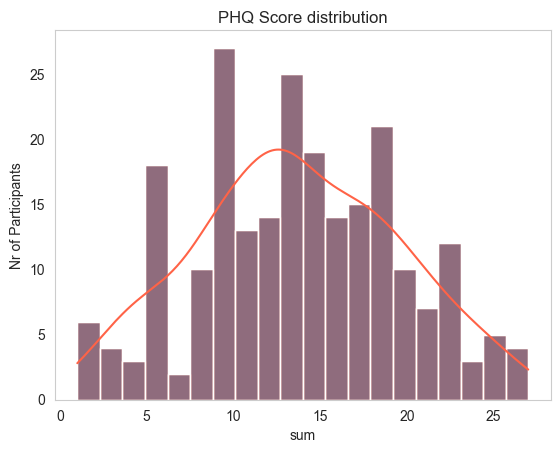

In [144]:
# repeat for PHQ
phq = pd.DataFrame()       
for column in data.columns:
    if "phq" in column:
        # add column to stai dataframe
        phq[column] = data[column]

phq["sum"] = phq.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
phq = phq[phq["sum"] != 0]
phq["sum"].plot(kind='hist', bins=20)
sns.histplot(phq["sum"], bins=20, kde=True, color='tomato')
plt.title('PHQ Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()

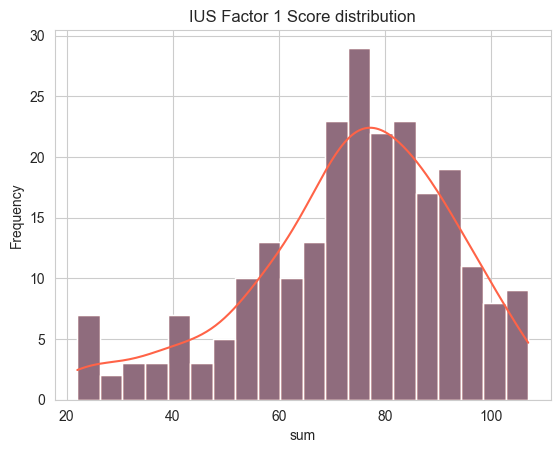

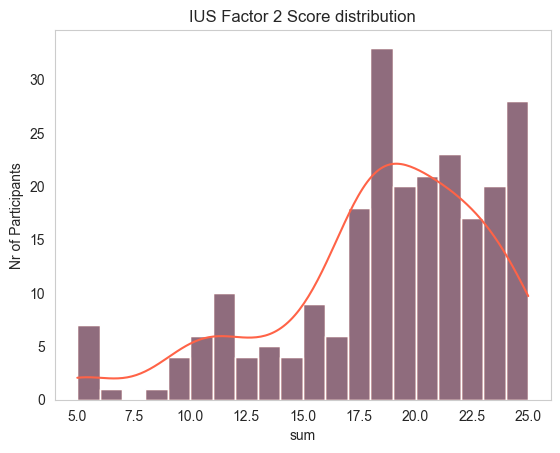

In [143]:
# repeat for IUS
ius1 = pd.DataFrame() 
ius2 = pd.DataFrame()      
for column in data.columns:
    if "ius_1" in column or "ius_2" in column or "ius_3" in column or "ius_9" in column or "ius_12" in column or "ius_13" in column or "ius_14" in column or "ius_15" in column or "ius_16" in column or "ius_17" in column or "ius_20" in column or "ius_22" in column or "ius_23" in column or "ius_24" in column or "ius_25" in column:
        # add column to stai dataframe
        ius1[column] = data[column]
    elif "ius_4" in column or "ius_5" in column or "ius_6" in column or "ius_7" in column or "ius_8" in column or "ius_10" in column or "ius_11" in column or "ius_18" in column or "ius_19" in column or "ius_21" in column or "ius_26" in column or "ius_27" in column:
        ius2[column] = data[column]

ius1["sum"] = ius1.sum(axis=1)
ius2["sum"] = ius2.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
ius1 = ius1[ius1["sum"] != 0]
ius1["sum"].plot(kind='hist', bins=20)
sns.histplot(ius1["sum"], bins=20, kde=True, color='tomato')
plt.title('IUS Factor 1 Score distribution')
plt.show()

ius2 = ius2[ius2["sum"] != 0]
ius2["sum"].plot(kind='hist', bins=20)
sns.histplot(ius2["sum"], bins=20, kde=True, color='tomato')
plt.title('IUS Factor 2 Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()



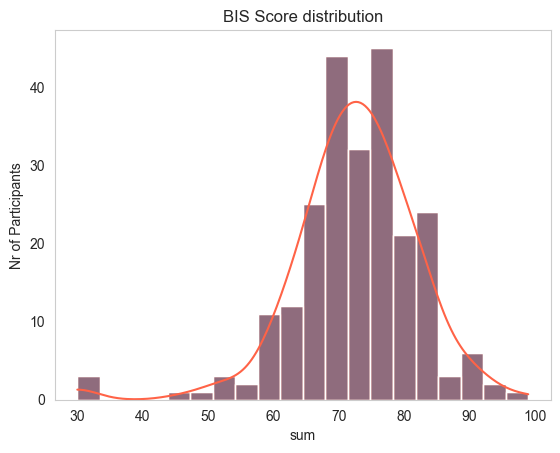

In [142]:
# repeat for BIS
bis = pd.DataFrame()       
for column in data.columns:
    if "bis" in column:
        # add column to stai dataframe
        bis[column] = data[column]

bis["sum"] = bis.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
bis = bis[bis["sum"] != 0]
bis["sum"].plot(kind='hist', bins=20)
sns.histplot(bis["sum"], bins=20, kde=True, color='tomato')
plt.title('BIS Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()

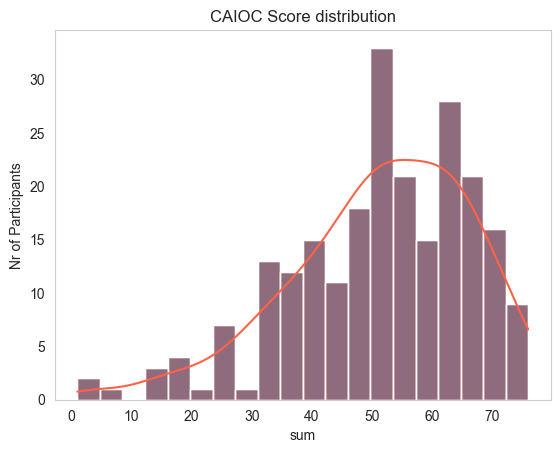

In [141]:
# repeat for CAIOC
caioc = pd.DataFrame()       
for column in data.columns:
    if "caioc" in column:
        # add column to stai dataframe
        caioc[column] = data[column]

caioc["sum"] = caioc.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
caioc = caioc[caioc["sum"] != 0]
caioc["sum"].plot(kind='hist', bins=20)
sns.histplot(caioc["sum"], bins=20, kde=True, color='tomato')
plt.title('CAIOC Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()

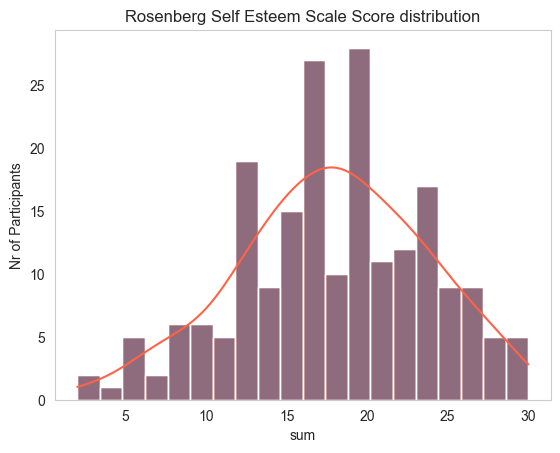

In [140]:
# repeat for Rosenberg
rosenberg = pd.DataFrame()       
for column in data.columns:
    if "rosenberg_3" in column or "rosenberg_5" in column or "rosenberg_8" in column or "rosenberg_9" in column or "rosenberg_10" in column:
        # add column to stai dataframe
        rosenberg[column] = np.abs(data[column] - 3)
    elif "rosenberg_1" in column or "rosenberg_2" in column or "rosenberg_4" in column or "rosenberg_6" in column or "rosenberg_7" in column: 
        rosenberg[column] = data[column]

rosenberg["sum"] = rosenberg.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
rosenberg = rosenberg[rosenberg["sum"] != 0]
rosenberg["sum"].plot(kind='hist', bins=20)
sns.histplot(rosenberg["sum"], bins=20, kde=True, color='tomato')
plt.title('Rosenberg Self Esteem Scale Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()



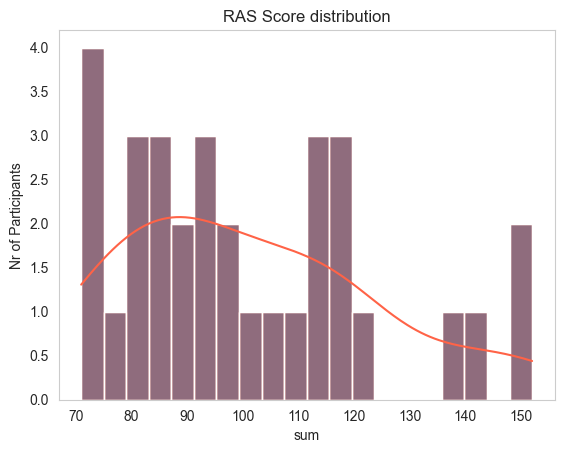

In [139]:
# repeat for RAS
ras = pd.DataFrame()       
for column in data.columns:
    if "ras" in column:
        # add column to stai dataframe
        ras[column] = data[column]

ras["sum"] = ras.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
ras = ras[ras["sum"] != 0]
ras["sum"].plot(kind='hist', bins=20)
sns.histplot(ras["sum"], bins=20, kde=True, color='tomato')
plt.title('RAS Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()